In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#data = Path('./Resources/combined_data.csv')
data = Path('./Resources/topfive_coleoptera.csv')
df = pd.read_csv(data)
df.head()

,order_name,family_name,datetime,individuals,tempmax,tempmin,temp_daily,humidity
0,COLEOPTERA,CARABIDAE,2003-07-20,2,76.9,60.9,69.9,69.9
1,COLEOPTERA,CARABIDAE,2000-06-21,3,86.0,64.1,75.6,67.5
2,COLEOPTERA,CARABIDAE,2007-06-10,1,81.7,60.4,71.9,55.4
3,COLEOPTERA,CARABIDAE,1992-07-02,1,71.2,58.8,65.5,59.2
4,COLEOPTERA,CARABIDAE,1993-05-23,1,73.3,55.2,63.3,66.8


In [4]:
y = df["individuals"]
X = df.drop(columns="order_name", )

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(2930, 1)

In [6]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = classifier.predict(X)
print(y_pred.shape)

(3907,)


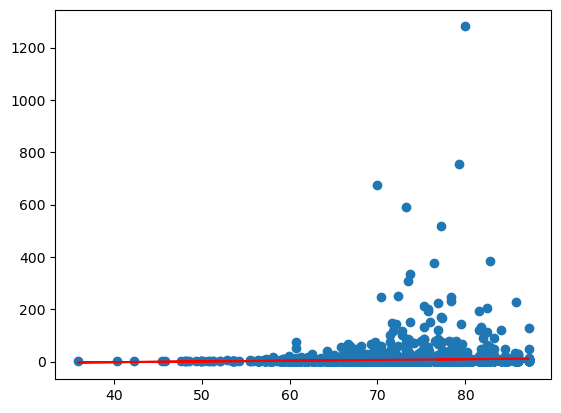

In [8]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()

In [9]:
print(classifier.coef_)
print(classifier.intercept_)

[0.28474144]
-13.942612031956882


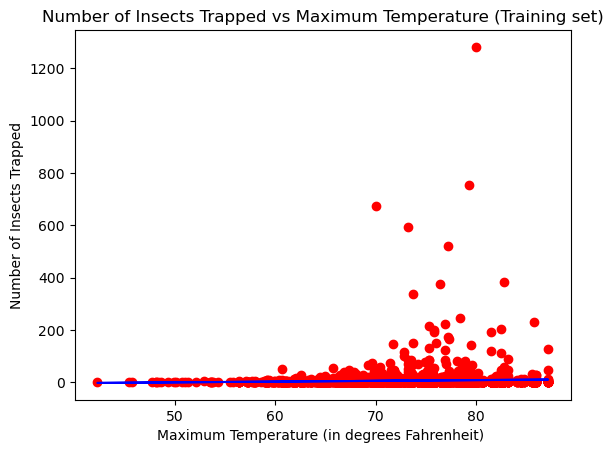

In [6]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Maximum Temperature (Training set)')
plt.xlabel('Maximum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [7]:
y = df["individuals"]
X = df.loc[:,["tempmin"]]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(2930, 1)

In [9]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

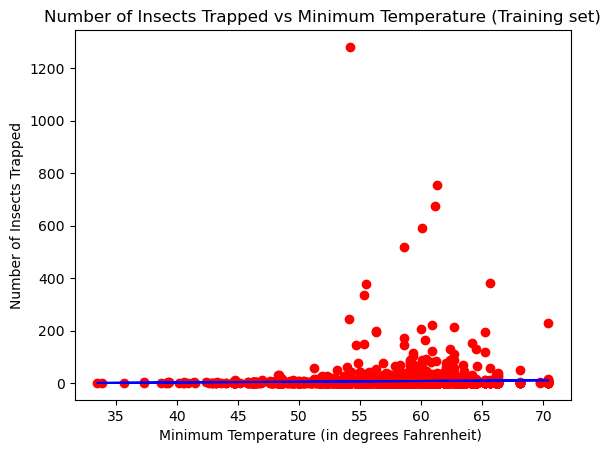

In [10]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Minimum Temperature (Training set)')
plt.xlabel('Minimum Temperature (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [11]:
y = df["individuals"]
X = df.loc[:,["temp_daily"]]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(2930, 1)

In [13]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

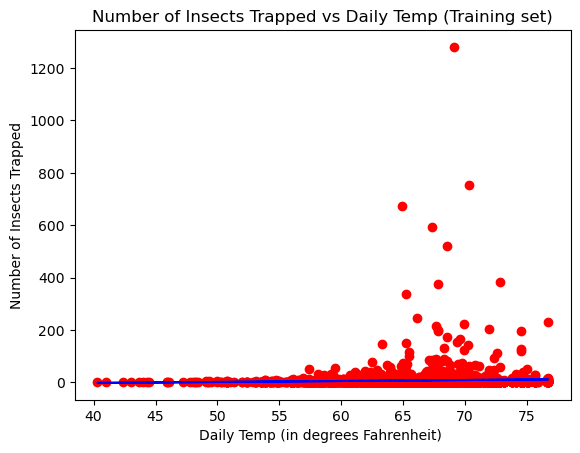

In [14]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Daily Temp (Training set)')
plt.xlabel('Daily Temp (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [15]:
y = df["individuals"]
X = df.loc[:,["humidity"]]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(2930, 1)

In [17]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

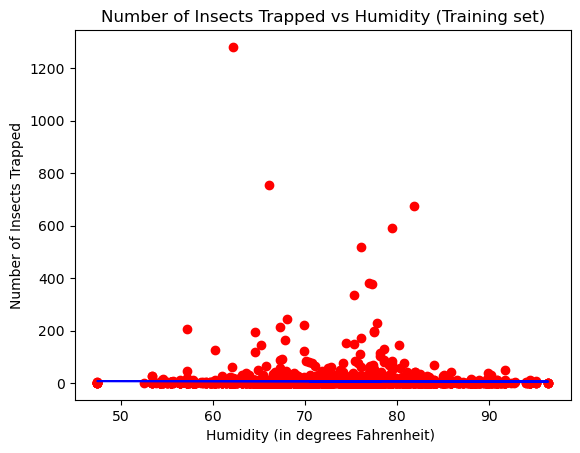

In [18]:
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('Number of Insects Trapped vs Humidity (Training set)')
plt.xlabel('Humidity (in degrees Fahrenheit) ')
plt.ylabel('Number of Insects Trapped')
plt.show()

In [19]:
# Segment the features from the target
y = df["individuals"]
X = df.drop(columns=["order_name", "family_name", "datetime", "individuals", "tempmax","tempmin"])

In [20]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape

(3125, 2)

In [21]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [22]:
# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,2
4,1,2


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.551150895140665

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[431,   0,   0, ...,   0,   0,   0],
       [103,   0,   0, ...,   0,   0,   0],
       [ 54,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      1.00      0.71       431
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         3
          18       0.00    

c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Andrea\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif